# Setup

In [1]:
import pandas as pd
import quandl as quandl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Retreive Data

First get USD/BTC for base currency. 

In [2]:
btc_usd_denominated = quandl.get("BCHAIN/MKPRU", authtoken="6qwbDx25mja4FhBpTfRo")["Value"]

In [3]:
daterange = pd.date_range('17/8/2010', end='22/4/2017', freq='D')
print(daterange)

DatetimeIndex(['2010-08-17', '2010-08-18', '2010-08-19', '2010-08-20',
               '2010-08-21', '2010-08-22', '2010-08-23', '2010-08-24',
               '2010-08-25', '2010-08-26',
               ...
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22'],
              dtype='datetime64[ns]', length=2441, freq='D')


In [4]:
dataset = pd.Series(1/usd_btc, name="USDBTC", index=daterange)
plt.plot(usd_btc_denominated) 

NameError: name 'usd_btc' is not defined

Shapeshift currencies available:
`btc, ltc, ppc, drk, doge, nmc, ftc, blk, nxt, btcd, qrk, rdd, nbt, bts, bitusd, xcp, xmr`

Ethtokens available:
`augur, golem, eth, singular dtv, iconomi`

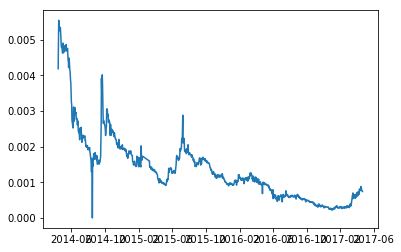

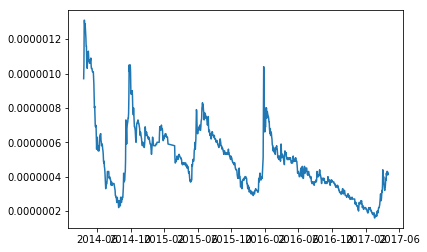

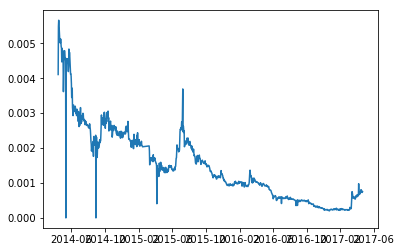

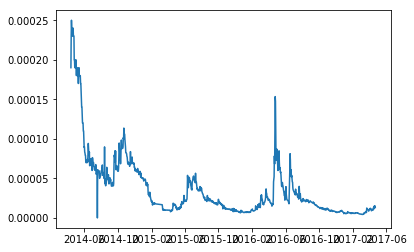

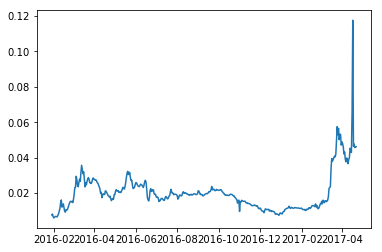

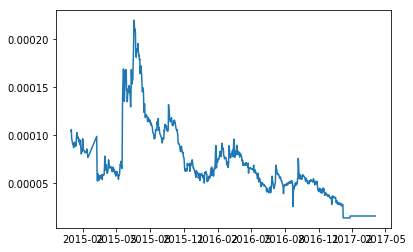

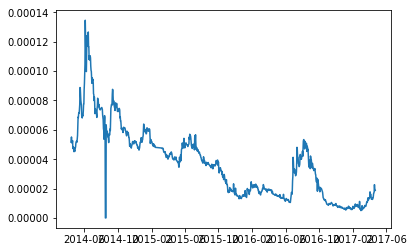

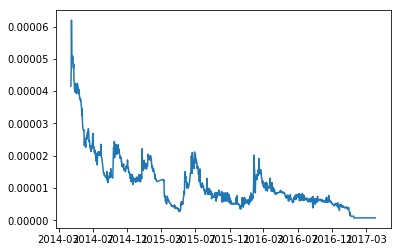

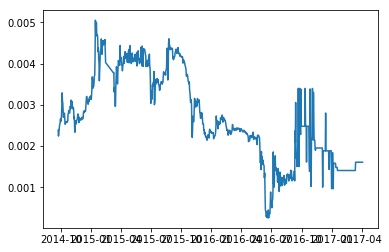

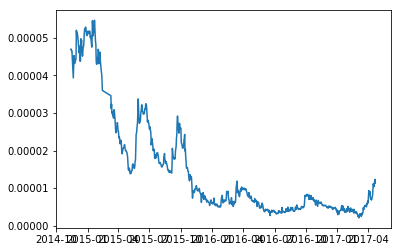

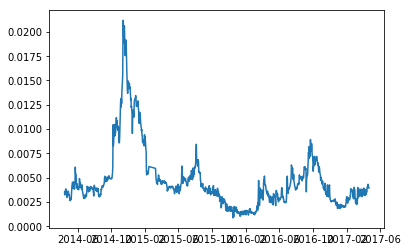

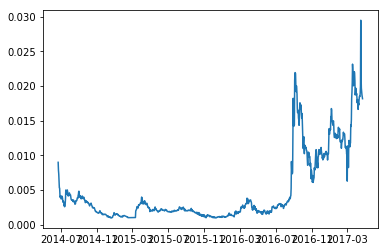

In [957]:
test = ["BTER/PPCBTC", "BTER/DOGEBTC","BTER/NMCBTC","BTER/FTCBTC","BTER/ETHBTC",
       "BTER/BLKBTC","BTER/NXTBTC","BTER/QRKBTC","BTER/NBTBTC", "BTER/BTSBTC",
       "BTER/XCPBTC", "BTER/XMRBTC"]

for crypto in test:
    response = quandl.get(crypto, authtoken="6qwbDx25mja4FhBpTfRo")["Average"]
    plt.plot(response)
    plt.show()
    additional = pandas.Series(response, name=crypto[-6:])
    dataset = pandas.concat([dataset, additional], axis=1)

In [958]:
dataset.to_csv("crypto_currencies.csv")

In [959]:
dataset.describe()

USDBTC       PPCBTC        OGEBTC       NMCBTC       FTCBTC  \
count  2441.000000  1068.000000  1.068000e+03  1068.000000  1068.000000   
mean      0.617915     0.001375  4.925094e-07     0.001490     0.000036   
std       2.437711     0.000995  2.000077e-07     0.001078     0.000040   
min       0.000778     0.000000  1.600000e-07     0.000000     0.000000   
25%       0.002189     0.000620  3.600000e-07     0.000578     0.000010   
50%       0.004386     0.001140  4.700000e-07     0.001217     0.000021   
75%       0.111732     0.001750  6.100000e-07     0.002189     0.000050   
max      16.420361     0.005540  1.310000e-06     0.005660     0.000250   

           ETHBTC      BLKBTC       NXTBTC        QRKBTC      NBTBTC  \
count  447.000000  799.000000  1068.000000  1.049000e+03  894.000000   
mean     0.019933    0.000070     0.000037  1.099093e-05    0.002664   
std      0.010652    0.000038     0.000025  8.802366e-06    0.001066   
min      0.005923    0.000014     0.000000  7.600000e-07    0.000255   
25%      0.012804    0.000049     0.000015  5.560000e-06    0.001881   
50%      0.018754    0.000062     0.000036  8.120000e-06    0.002481   
75%      0.022474    0.000085     0.000051  1.452000e-05    0.003570   
max      0.117659    0.000220     0.000135  6.195000e-05    0.005050   

           BTSBTC       XCPBTC       XMRBTC  
count  862.000000  1067.000000  1000.000000  
mean     0.000015     0.004641     0.004872  
std      0.000014     0.003158     0.005159  
min      0.000002     0.000850     0.000971  
25%      0.000005     0.002925     0.001723  
50%      0.000008     0.003860     0.002431  
75%      0.000020     0.004935     0.004856  
max      0.000055     0.021200     0.029487

# Cleanup

In [960]:
dataset_drop_na = dataset.dropna()
dataset_tiny_zero = dataset_drop_na.replace(to_replace=0.000000, value=0.000001) # Get rid of 0s for log returns

In [961]:
logged_dataset = numpy.log(dataset_tiny_zero/dataset_tiny_zero.shift())

In [962]:
logged_dataset.describe()

USDBTC      PPCBTC      OGEBTC      NMCBTC      FTCBTC      ETHBTC  \
count  428.000000  428.000000  428.000000  428.000000  428.000000  428.000000   
mean    -0.002556   -0.001393   -0.001708   -0.001241    0.000458    0.003993   
std      0.029781    0.077422    0.039367    0.067826    0.118359    0.075514   
min     -0.111936   -0.380464   -0.120628   -0.354470   -0.365562   -0.512454   
25%     -0.011947   -0.036368   -0.024693   -0.023877   -0.052896   -0.024362   
50%     -0.002514    0.000000    0.000000   -0.003341   -0.011674   -0.000571   
75%      0.004125    0.032790    0.017469    0.018111    0.033482    0.033074   
max      0.163125    0.344840    0.228842    0.507148    0.668883    0.450416   

           BLKBTC      NXTBTC      QRKBTC      NBTBTC      BTSBTC      XCPBTC  \
count  428.000000  428.000000  428.000000  428.000000  428.000000  428.000000   
mean    -0.003299   -0.001060   -0.007115   -0.001200    0.000156    0.002008   
std      0.072610    0.085308    0.111228    0.180132    0.099009    0.121092   
min     -0.682490   -0.457977   -0.521297   -0.771675   -0.284547   -0.491898   
25%     -0.022798   -0.040731   -0.040405   -0.009525   -0.047127   -0.060463   
50%      0.000000   -0.008863    0.000000    0.000000   -0.001379   -0.003322   
75%      0.013231    0.025396    0.024220    0.002894    0.043263    0.047723   
max      0.586417    0.473857    0.652055    0.882291    0.374882    0.668111   

           XMRBTC  
count  428.000000  
mean     0.005911  
std      0.101071  
min     -0.552616  
25%     -0.036756  
50%      0.002780  
75%      0.040548  
max      0.561282

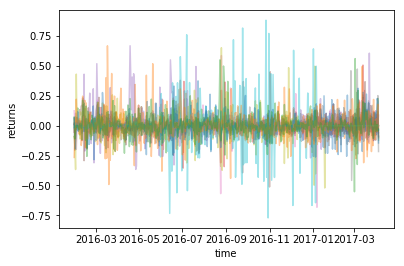

In [963]:
plt.plot(logged_dataset, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
plt.show()

In [964]:
logged_dataset.compound(skipna=True)

USDBTC   -0.722476
PPCBTC   -0.852460
OGEBTC   -0.652670
NMCBTC   -0.775247
FTCBTC   -0.921932
ETHBTC    0.560115
BLKBTC   -0.940468
NXTBTC   -0.864358
QRKBTC   -0.997158
NBTBTC   -0.999813
BTSBTC   -0.869304
XCPBTC   -0.892162
XMRBTC    0.434785
dtype: float64

In [965]:
logged_dataset.mean()

USDBTC   -0.002556
PPCBTC   -0.001393
OGEBTC   -0.001708
NMCBTC   -0.001241
FTCBTC    0.000458
ETHBTC    0.003993
BLKBTC   -0.003299
NXTBTC   -0.001060
QRKBTC   -0.007115
NBTBTC   -0.001200
BTSBTC    0.000156
XCPBTC    0.002008
XMRBTC    0.005911
dtype: float64

In [939]:
logged_cov = logged_dataset.cov()

In [967]:
logged_cov

USDBTC    PPCBTC    OGEBTC    NMCBTC    FTCBTC    ETHBTC    BLKBTC  \
USDBTC  0.000887  0.000285  0.000278 -0.000045  0.000287  0.000251  0.000017   
PPCBTC  0.000285  0.005994  0.000490  0.000920 -0.000541  0.000437  0.000415   
OGEBTC  0.000278  0.000490  0.001550  0.000225  0.000448  0.000411  0.000078   
NMCBTC -0.000045  0.000920  0.000225  0.004600 -0.000201  0.000277  0.000881   
FTCBTC  0.000287 -0.000541  0.000448 -0.000201  0.014009  0.000265  0.000653   
ETHBTC  0.000251  0.000437  0.000411  0.000277  0.000265  0.005702  0.000363   
BLKBTC  0.000017  0.000415  0.000078  0.000881  0.000653  0.000363  0.005272   
NXTBTC  0.000185  0.000167  0.000639  0.000867  0.000268 -0.000035  0.000845   
QRKBTC  0.000213  0.000769  0.000229  0.000857  0.000600  0.000534  0.002082   
NBTBTC  0.000165  0.000508  0.000325  0.000194  0.000585 -0.000339 -0.000479   
BTSBTC  0.000245  0.000960  0.000706  0.001368  0.000011  0.001152  0.000380   
XCPBTC -0.000099  0.000040  0.000158  0.000460 -0.000120  0.000006 -0.000269   
XMRBTC  0.000226  0.000891  0.000353 -0.000438  0.001668  0.000885  0.000329   

          NXTBTC    QRKBTC    NBTBTC    BTSBTC    XCPBTC    XMRBTC  
USDBTC  0.000185  0.000213  0.000165  0.000245 -0.000099  0.000226  
PPCBTC  0.000167  0.000769  0.000508  0.000960  0.000040  0.000891  
OGEBTC  0.000639  0.000229  0.000325  0.000706  0.000158  0.000353  
NMCBTC  0.000867  0.000857  0.000194  0.001368  0.000460 -0.000438  
FTCBTC  0.000268  0.000600  0.000585  0.000011 -0.000120  0.001668  
ETHBTC -0.000035  0.000534 -0.000339  0.001152  0.000006  0.000885  
BLKBTC  0.000845  0.002082 -0.000479  0.000380 -0.000269  0.000329  
NXTBTC  0.007277  0.000399 -0.000255  0.000715  0.001169 -0.000837  
QRKBTC  0.000399  0.012372  0.000151  0.001257 -0.000722  0.000654  
NBTBTC -0.000255  0.000151  0.032447  0.000248 -0.000095  0.000060  
BTSBTC  0.000715  0.001257  0.000248  0.009803  0.001088  0.000475  
XCPBTC  0.001169 -0.000722 -0.000095  0.001088  0.014663  0.001214  
XMRBTC -0.000837  0.000654  0.000060  0.000475  0.001214  0.010215

## Example

In [968]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = numpy.random.randn(n_assets, n_obs)

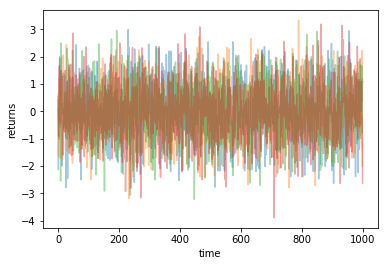

In [969]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
plt.show()

In [970]:
def old_random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = numpy.asmatrix(numpy.mean(returns, axis=1))
    w = numpy.asmatrix(rand_weights(returns.shape[0]))
    C = numpy.asmatrix(numpy.cov(returns))
    
#     print('weights', w)
#     print('returns', p)
#     print('cov', C)

 
    mu = w * p.T
    sigma = numpy.sqrt(w * C * w.T)
    
#     print(sigma)

    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return old_random_portfolio(returns)
    return mu, sigma

In [971]:
n_portfolios = 500

old_means, old_stds = numpy.column_stack([
    old_random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

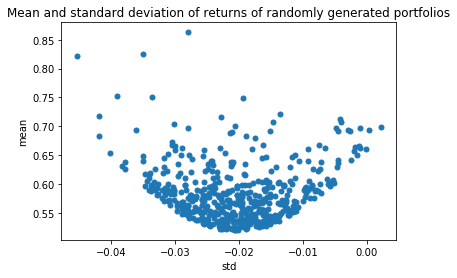

In [972]:
plt.plot(old_means, old_stds, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
plt.autoscale(False)

In [947]:
def old_optimal_portfolio(returns):
    n = len(returns)
    returns = numpy.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(numpy.cov(returns))
    pbar = opt.matrix(numpy.mean(returns, axis=1))
        
    # Create constraint matrices
    G = -opt.matrix(numpy.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [numpy.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = numpy.polyfit(returns, risks, 2)
    x1 = numpy.sqrt(m1[2] / m1[0])
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    
    #return numpy.asarray(wt), returns, risks
    return numpy.asarray(wt), returns, risks

old_optimal_portfolio(return_vec)

(array([[  1.13939319e-08],
        [  5.49394849e-08],
        [  5.13438880e-05],
        [  9.99948590e-01]]),
 [0.06188582648501183,
  0.05848997122698691,
  0.055463388883649406,
  0.05276593849909491,
  0.050361814190719945,
  0.04821861571642239,
  0.04578804829954217,
  0.0424933058791679,
  0.03955683225394796,
  0.03693960887098309,
  0.034607111626371534,
  0.03252824113109628,
  0.030675439883426792,
  0.029024126892482585,
  0.027552391690470544,
  0.026240705895931617,
  0.02507166452576836,
  0.024029755232745885,
  0.023101152562529564,
  0.022273534542375253,
  0.021535913419026075,
  0.020878515011867858,
  0.020292607573500553,
  0.019770416703379062,
  0.019305013400815165,
  0.018890222146373384,
  0.018520538974601805,
  0.018191058452836893,
  0.017897408598124796,
  0.017635692869586814,
  0.017402438467000465,
  0.017194550252213548,
  0.017009269679146163,
  0.016844138189583434,
  0.016696964590805476,
  0.016565795979955965,
  0.016448891830317544,
  0.01634

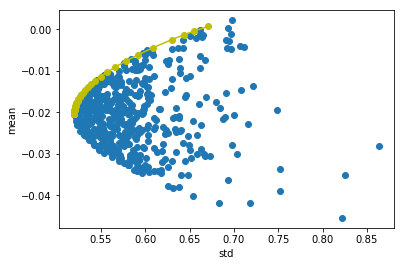

In [973]:
old_weights, old_returns, old_risks = old_optimal_portfolio(return_vec)

plt.plot(old_stds, old_means, 'o')
plt.ylabel('mean')
plt.xlabel('std')

plt.plot(old_risks, old_returns, 'y-o')
plt.autoscale(False)
plt.show()

# Actual

In [974]:
import cvxopt as opt
from cvxopt import blas, solvers

In [975]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = numpy.asmatrix(returns.mean())
    w = numpy.asmatrix(rand_weights(len(returns.mean())))
    C = numpy.asmatrix(returns.cov())

    mu = w * p.T # mean 
    
    print("\n",p)
    print("\n",w)
    print("\n",C)
    print("\n",mu)
    
    sigma = numpy.sqrt(w * C * w.T) # standard deviation

    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [ ]:
n_portfolios = 5000

means, stds = numpy.column_stack([
    random_portfolio(logged_dataset) 
    for _ in range(n_portfolios)
])


 [[-0.00255561 -0.00139322 -0.00170768 -0.00124063  0.00045761  0.00399302
  -0.00329864 -0.00106005 -0.00711483 -0.00119991  0.00015602  0.00200816
   0.00591129]]

 [[ 0.06240991  0.10730953  0.11292667  0.01542313  0.12745852  0.0209831
   0.05331687  0.13150186  0.09458648  0.04981254  0.08995394  0.10422985
   0.0300876 ]]

 [[  8.86911176e-04   2.84631637e-04   2.77673198e-04  -4.48228889e-05
    2.86706563e-04   2.51219036e-04   1.74349757e-05   1.85366197e-04
    2.13062789e-04   1.65444332e-04   2.44792549e-04  -9.88983278e-05
    2.26221388e-04]
 [  2.84631637e-04   5.99411385e-03   4.90057059e-04   9.19741438e-04
   -5.40794165e-04   4.37080355e-04   4.15486474e-04   1.67156891e-04
    7.68558533e-04   5.08488927e-04   9.60234735e-04   3.97528706e-05
    8.91161934e-04]
 [  2.77673198e-04   4.90057059e-04   1.54972815e-03   2.24957976e-04
    4.47520010e-04   4.11438291e-04   7.78932933e-05   6.38679780e-04
    2.28757895e-04   3.25187857e-04   7.06203786e-04   1.58262537e-

In [ ]:
plt.plot(stds, means, 'o', markersize=5)

plt.xlabel('std')
plt.ylabel('mean')

plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [798]:
def optimal_portfolio(returns):
    n = len(returns.columns)
    return_matrix = numpy.asmatrix(returns)
    
    N = 1000 # Portfolios
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)] # Averags
     
    # Convert to cvxopt matrices
    S = opt.matrix(numpy.asmatrix(returns.cov()))
    
    pbar = opt.matrix(returns.mean())
    
    # Create constraint matrices
    G = -opt.matrix(numpy.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
        
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
        
    return np.asarray(wt), returns, risks

optimal_portfolio(logged_dataset)

(array([[  7.34269288e-08],
        [  1.02166166e-07],
        [  9.31159509e-08],
        [  1.07459453e-07],
        [  1.86709466e-07],
        [  1.47678944e-07],
        [  6.07957437e-08],
        [  1.13809695e-07],
        [  2.96797586e-08],
        [  1.09094077e-07],
        [  1.68940075e-07],
        [  3.18162729e-07],
        [  9.99998489e-01]]),
 [0.005911277914822853,
  0.005911278016549693,
  0.005911278124233798,
  0.005911278238073891,
  0.0059112783582739945,
  0.005911278485043485,
  0.005911278618597167,
  0.005911278759155321,
  0.005911278906943733,
  0.005911279062193743,
  0.005911279225142249,
  0.005911279396031714,
  0.005911279575110165,
  0.005911279762631155,
  0.00591127995885372,
  0.005911280164042312,
  0.005911280378466716,
  0.005911280602401915,
  0.0059112808361279755,
  0.005911281079929845,
  0.005911281334097168,
  0.005911281598924032,
  0.005911281874708687,
  0.005911282161753236,
  0.005911282460363249,
  0.0059112827708473524,
  0.0059

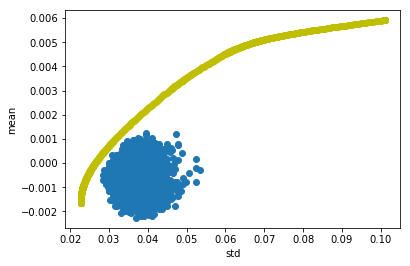

In [799]:
weights, returns, risks = optimal_portfolio(logged_dataset)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')

plt.plot(risks, returns, 'y-o')
plt.autoscale(False)

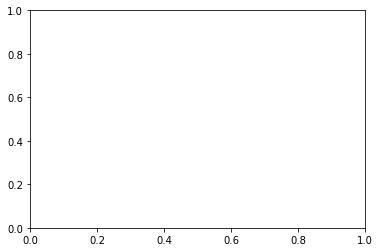

In [792]:
plt.autoscale(False)

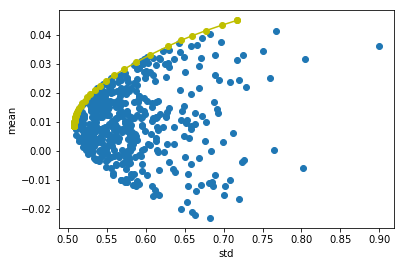

In [795]:
old_weights, old_returns, old_risks = old_optimal_portfolio(return_vec)

plt.plot(old_stds, old_means, 'o')
plt.ylabel('mean')
plt.xlabel('std')

plt.plot(old_risks, old_returns, 'y-o')
plt.autoscale(False)
plt.show()

In [ ]:
## NUMBER OF ASSETS
n_assets = 12

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = numpy.random.randn(n_assets, n_obs)

In [839]:
def old_optimal_portfolio(returns):
    n = len(returns)
    returns = numpy.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(numpy.cov(returns))
    pbar = opt.matrix(numpy.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(numpy.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    print(numpy.mean(returns, axis=1))
    print(pbar)
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [numpy.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = numpy.polyfit(returns, risks, 2)
    x1 = numpy.sqrt(m1[2] / m1[0])
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    
    #return numpy.asarray(wt), returns, risks
    #return numpy.asarray(wt), returns, risks

old_optimal_portfolio(return_vec)

[[ 0.04041737]
 [-0.03725534]
 [ 0.04899997]
 [-0.01361991]]
[ 4.04e-02]
[-3.73e-02]
[ 4.90e-02]
[-1.36e-02]



In [859]:
numpy.mean(logged_dataset.mean())

-0.0005418823629599637

In [840]:
def optimal_portfolio(returns):
    n = len(returns.columns)
    return_matrix = numpy.asmatrix(returns)
    
    N = 1000 # Portfolios
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)] # Averags
     
    # Convert to cvxopt matrices
    S = opt.matrix(numpy.asmatrix(returns.cov()))
    
    print(returns.mean())
    pbar = opt.matrix(returns.mean())
    
    print(pbar)

    # Create constraint matrices
    G = matrix(0.0, (n,n))
    G[::n+1] = -1.0
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
        
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
        
    return np.asarray(wt), returns, risks

optimal_portfolio(logged_dataset)

USDBTC   -0.002556
PPCBTC   -0.001393
OGEBTC   -0.001708
NMCBTC   -0.001241
FTCBTC    0.000458
ETHBTC    0.003993
BLKBTC   -0.003299
NXTBTC   -0.001060
QRKBTC   -0.007115
NBTBTC   -0.001200
BTSBTC    0.000156
XCPBTC    0.002008
XMRBTC    0.005911
dtype: float64
[-2.56e-03]
[-1.39e-03]
[-1.71e-03]
[-1.24e-03]
[ 4.58e-04]
[ 3.99e-03]
[-3.30e-03]
[-1.06e-03]
[-7.11e-03]
[-1.20e-03]
[ 1.56e-04]
[ 2.01e-03]
[ 5.91e-03]



(array([[  7.34269288e-08],
        [  1.02166166e-07],
        [  9.31159509e-08],
        [  1.07459453e-07],
        [  1.86709466e-07],
        [  1.47678944e-07],
        [  6.07957437e-08],
        [  1.13809695e-07],
        [  2.96797586e-08],
        [  1.09094077e-07],
        [  1.68940075e-07],
        [  3.18162729e-07],
        [  9.99998489e-01]]),
 [0.005911277914822853,
  0.005911278016549693,
  0.0059112781242337984,
  0.005911278238073892,
  0.005911278358273994,
  0.005911278485043485,
  0.005911278618597167,
  0.005911278759155321,
  0.005911278906943733,
  0.005911279062193743,
  0.005911279225142249,
  0.005911279396031714,
  0.005911279575110165,
  0.005911279762631155,
  0.00591127995885372,
  0.005911280164042312,
  0.005911280378466716,
  0.005911280602401916,
  0.005911280836127976,
  0.005911281079929845,
  0.005911281334097168,
  0.005911281598924032,
  0.005911281874708687,
  0.005911282161753237,
  0.005911282460363249,
  0.0059112827708473524,
  0.00591

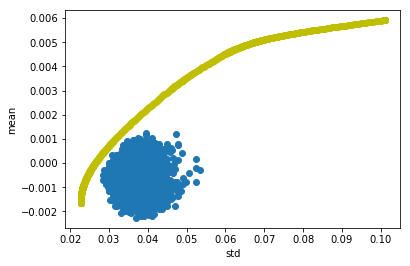

In [828]:
weights, returns, risks = optimal_portfolio(logged_dataset)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')

plt.plot(risks, returns, 'y-o')
plt.autoscale(False)

# Convex Optimization

In [808]:
from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp
import pylab

In [809]:
# Problem data.
n = 4
S = matrix([[ 4e-2,  6e-3, -4e-3,    0.0 ],
            [ 6e-3,  1e-2,  0.0,     0.0 ],
            [-4e-3,  0.0,   2.5e-3,  0.0 ],
            [ 0.0,   0.0,   0.0,     0.0 ]])
pbar = matrix([.12, .10, .07, .03])


G = matrix(0.0, (n,n))
G[::n+1] = -1.0

h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)



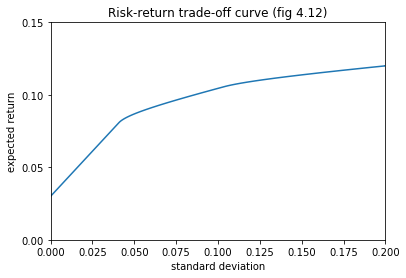

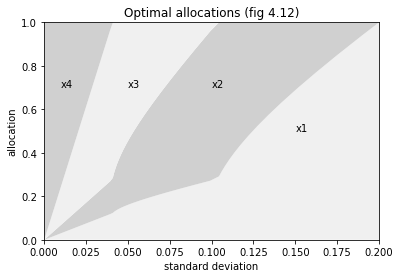

In [801]:
# Compute trade-off.
N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
portfolios = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in portfolios ]
risks = [ sqrt(dot(x, S*x)) for x in portfolios ]

# Plot trade-off curve and optimal allocations.
pylab.figure(1, facecolor='w')
pylab.plot(risks, returns)
pylab.xlabel('standard deviation')
pylab.ylabel('expected return')
pylab.axis([0, 0.2, 0, 0.15])
pylab.title('Risk-return trade-off curve (fig 4.12)')
pylab.yticks([0.00, 0.05, 0.10, 0.15])

pylab.figure(2, facecolor='w')
c1 = [ x[0] for x in portfolios ]
c2 = [ x[0] + x[1] for x in portfolios ]
c3 = [ x[0] + x[1] + x[2] for x in portfolios ]
c4 = [ x[0] + x[1] + x[2] + x[3] for x in portfolios ]
pylab.fill(risks + [.20], c1 + [0.0], '#F0F0F0')
pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1, facecolor = '#D0D0D0')
pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2, facecolor = '#F0F0F0')
pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3, facecolor = '#D0D0D0')
pylab.axis([0.0, 0.2, 0.0, 1.0])
pylab.xlabel('standard deviation')
pylab.ylabel('allocation')
pylab.text(.15,.5,'x1')
pylab.text(.10,.7,'x2')
pylab.text(.05,.7,'x3')
pylab.text(.01,.7,'x4')
pylab.title('Optimal allocations (fig 4.12)')
pylab.show()

In [860]:
logged_dataset

USDBTC    PPCBTC    OGEBTC    NMCBTC    FTCBTC    ETHBTC  \
Date                                                                     
2016-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-30  0.013637  0.025106 -0.090384 -0.054427  0.010907  0.061366   
2016-01-31 -0.002594 -0.068403 -0.114410  0.024610  0.005900 -0.204851   
2016-02-01  0.003655  0.000000  0.073025  0.011707  0.104183 -0.107923   
2016-02-02  0.012980 -0.017858 -0.028573 -0.027930 -0.196557  0.063451   
2016-02-03 -0.003971  0.026668  0.000000  0.027376 -0.008639  0.066211   
2016-02-04  0.013749 -0.017700  0.147920 -0.004130 -0.025262  0.001334   
2016-02-05 -0.044284 -0.027151 -0.025318 -0.005049 -0.035091 -0.022163   
2016-02-06 -0.003707 -0.027909  0.025318  0.000490  0.021653 -0.009891   
2016-02-07  0.035420  0.000000 -0.077962  0.010195 -0.011338  0.134047   
2016-02-08 -0.001875  0.037041  0.013423 -0.002595  0.024776  0.092181   
2016-02-09 -0.005497 -0.027652  0.039221  0.002158  0.011062  0.165016   
2016-02-10  0.008525  0.036701 -0.012903 -0.124169  0.036721  0.162565   
2016-02-11 -0.016951 -0.046091 -0.013072  0.081709  0.019948  0.231947   
2016-02-12  0.005902  0.009390 -0.013245  0.020736  0.031716  0.114346   
2016-02-13 -0.012424  0.045670  0.000000  0.005966  0.430984 -0.292731   
2016-02-14 -0.018545 -0.018019 -0.013423 -0.043365 -0.212079  0.082251   
2016-02-15 -0.034846 -0.027652 -0.027399  0.036267  0.050484  0.062609   
2016-02-16 -0.000646 -0.009390  0.000000 -0.047049  0.054634 -0.173167   
2016-02-17 -0.010008 -0.099091 -0.057158 -0.052484 -0.193012 -0.194775   
2016-02-18 -0.027526  0.040822 -0.029853 -0.028803 -0.066661 -0.044613   
2016-02-19 -0.002222  0.058269 -0.015267  0.004969  0.064007  0.149223   
2016-02-20  0.002270  0.027909  0.045120  0.095727  0.124746 -0.022575   
2016-02-21 -0.050063  0.009132 -0.060625  0.033080  0.272120  0.015799   
2016-02-22  0.011005  0.018019  0.000000 -0.050980 -0.063943  0.110306   
2016-02-23 -0.008773 -0.018019  0.030772 -0.021950 -0.148979  0.114008   
2016-02-24  0.050274 -0.027652 -0.015267 -0.010793  0.018979  0.067326   
2016-02-25 -0.014522  0.054559 -0.031253 -0.020800 -0.030094  0.059229   
2016-02-26  0.004026 -0.026907 -0.016000 -0.010931  0.308514  0.018184   
2016-02-27 -0.006953 -0.018349 -0.049597  0.002758 -0.310752 -0.022581   
...              ...       ...       ...       ...       ...       ...   
2017-03-05  0.014194 -0.033902  0.000000 -0.014575 -0.011223 -0.078790   
2017-03-06 -0.003078  0.159065  0.060625  0.070675 -0.015928 -0.016200   
2017-03-07 -0.003349 -0.060625  0.000000  0.215491  0.002291  0.072107   
2017-03-08  0.029243  0.197826  0.000000 -0.007268  0.009112  0.003073   
2017-03-09  0.067688 -0.137201  0.000000 -0.121449  0.033448 -0.034995   
2017-03-10 -0.029856  0.111226  0.057158  0.002603  0.063716  0.019925   
2017-03-11  0.081974 -0.026668  0.000000  0.006198  0.209053  0.037385   
2017-03-12 -0.070750 -0.084557 -0.057158 -0.000150 -0.114866  0.111337   
2017-03-13 -0.040173  0.257829  0.111226  0.507148  0.003738  0.237480   
2017-03-14 -0.009988  0.107631  0.051293  0.233916  0.159997  0.015535   
2017-03-15 -0.004470  0.097164 -0.051293  0.293662 -0.033956  0.029185   
2017-03-16 -0.009612  0.138150  0.000000 -0.042659  0.048163  0.367747   
2017-03-17  0.062730  0.000000  0.000000 -0.102799  0.111143  0.141652   
2017-03-18  0.079063  0.121361  0.100083 -0.079684  0.130019 -0.040493   
2017-03-19  0.136198 -0.259511  0.046520 -0.059935 -0.041489  0.025917   
2017-03-21 -0.096864  0.185403  0.000000  0.069127 -0.137390  0.047674   
2017-03-22 -0.064187 -0.149036  0.044452 -0.000909  0.607073 -0.009038   
2017-03-23  0.083783  0.035091  0.042560 -0.051580 -0.029318  0.036388   
2017-03-24 -0.009734  0.082692  0.080043 -0.000801 -0.043926  0.167438   
2017-03-25  0.097891  0.031253  0.074108 -0.048013 -0.058684  0.148630   
2017-03-26 -0.018326  0.000000  0.068993  0.019583 -0.014760 -0.083319   
2017-03-27  0.0026

In [861]:
upsampled = logged_dataset.resample('H')

In [874]:
logged_dataset

USDBTC    PPCBTC    OGEBTC    NMCBTC    FTCBTC    ETHBTC  \
Date                                                                     
2016-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-30  0.013637  0.025106 -0.090384 -0.054427  0.010907  0.061366   
2016-01-31 -0.002594 -0.068403 -0.114410  0.024610  0.005900 -0.204851   
2016-02-01  0.003655  0.000000  0.073025  0.011707  0.104183 -0.107923   
2016-02-02  0.012980 -0.017858 -0.028573 -0.027930 -0.196557  0.063451   
2016-02-03 -0.003971  0.026668  0.000000  0.027376 -0.008639  0.066211   
2016-02-04  0.013749 -0.017700  0.147920 -0.004130 -0.025262  0.001334   
2016-02-05 -0.044284 -0.027151 -0.025318 -0.005049 -0.035091 -0.022163   
2016-02-06 -0.003707 -0.027909  0.025318  0.000490  0.021653 -0.009891   
2016-02-07  0.035420  0.000000 -0.077962  0.010195 -0.011338  0.134047   
2016-02-08 -0.001875  0.037041  0.013423 -0.002595  0.024776  0.092181   
2016-02-09 -0.005497 -0.027652  0.039221  0.002158  0.011062  0.165016   
2016-02-10  0.008525  0.036701 -0.012903 -0.124169  0.036721  0.162565   
2016-02-11 -0.016951 -0.046091 -0.013072  0.081709  0.019948  0.231947   
2016-02-12  0.005902  0.009390 -0.013245  0.020736  0.031716  0.114346   
2016-02-13 -0.012424  0.045670  0.000000  0.005966  0.430984 -0.292731   
2016-02-14 -0.018545 -0.018019 -0.013423 -0.043365 -0.212079  0.082251   
2016-02-15 -0.034846 -0.027652 -0.027399  0.036267  0.050484  0.062609   
2016-02-16 -0.000646 -0.009390  0.000000 -0.047049  0.054634 -0.173167   
2016-02-17 -0.010008 -0.099091 -0.057158 -0.052484 -0.193012 -0.194775   
2016-02-18 -0.027526  0.040822 -0.029853 -0.028803 -0.066661 -0.044613   
2016-02-19 -0.002222  0.058269 -0.015267  0.004969  0.064007  0.149223   
2016-02-20  0.002270  0.027909  0.045120  0.095727  0.124746 -0.022575   
2016-02-21 -0.050063  0.009132 -0.060625  0.033080  0.272120  0.015799   
2016-02-22  0.011005  0.018019  0.000000 -0.050980 -0.063943  0.110306   
2016-02-23 -0.008773 -0.018019  0.030772 -0.021950 -0.148979  0.114008   
2016-02-24  0.050274 -0.027652 -0.015267 -0.010793  0.018979  0.067326   
2016-02-25 -0.014522  0.054559 -0.031253 -0.020800 -0.030094  0.059229   
2016-02-26  0.004026 -0.026907 -0.016000 -0.010931  0.308514  0.018184   
2016-02-27 -0.006953 -0.018349 -0.049597  0.002758 -0.310752 -0.022581   
...              ...       ...       ...       ...       ...       ...   
2017-03-05  0.014194 -0.033902  0.000000 -0.014575 -0.011223 -0.078790   
2017-03-06 -0.003078  0.159065  0.060625  0.070675 -0.015928 -0.016200   
2017-03-07 -0.003349 -0.060625  0.000000  0.215491  0.002291  0.072107   
2017-03-08  0.029243  0.197826  0.000000 -0.007268  0.009112  0.003073   
2017-03-09  0.067688 -0.137201  0.000000 -0.121449  0.033448 -0.034995   
2017-03-10 -0.029856  0.111226  0.057158  0.002603  0.063716  0.019925   
2017-03-11  0.081974 -0.026668  0.000000  0.006198  0.209053  0.037385   
2017-03-12 -0.070750 -0.084557 -0.057158 -0.000150 -0.114866  0.111337   
2017-03-13 -0.040173  0.257829  0.111226  0.507148  0.003738  0.237480   
2017-03-14 -0.009988  0.107631  0.051293  0.233916  0.159997  0.015535   
2017-03-15 -0.004470  0.097164 -0.051293  0.293662 -0.033956  0.029185   
2017-03-16 -0.009612  0.138150  0.000000 -0.042659  0.048163  0.367747   
2017-03-17  0.062730  0.000000  0.000000 -0.102799  0.111143  0.141652   
2017-03-18  0.079063  0.121361  0.100083 -0.079684  0.130019 -0.040493   
2017-03-19  0.136198 -0.259511  0.046520 -0.059935 -0.041489  0.025917   
2017-03-21 -0.096864  0.185403  0.000000  0.069127 -0.137390  0.047674   
2017-03-22 -0.064187 -0.149036  0.044452 -0.000909  0.607073 -0.009038   
2017-03-23  0.083783  0.035091  0.042560 -0.051580 -0.029318  0.036388   
2017-03-24 -0.009734  0.082692  0.080043 -0.000801 -0.043926  0.167438   
2017-03-25  0.097891  0.031253  0.074108 -0.048013 -0.058684  0.148630   
2017-03-26 -0.018326  0.000000  0.068993  0.019583 -0.014760 -0.083319   
2017-03-27  0.0026

In [865]:
type(logged_dataset)

pandas.core.frame.DataFrame

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))


In [ ]:
upsampled = series.resample('D')
print(upsampled.head(32))